In [1]:
%%time

import tensorflow as tf

# 载入并准备好 MNIST 数据集。将样本从整数转换为浮点数
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# 将模型的各层堆叠起来，以搭建 tf.keras.Sequential 模型。为训练选择优化器和损失函数
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 训练并验证模型
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 12s 207us/sample - loss: 0.2200 - accuracy: 0.9351
Epoch 2/5
60000/60000 [==============================] - 11s 188us/sample - loss: 0.0955 - accuracy: 0.9705
Epoch 3/5
60000/60000 [==============================] - 12s 195us/sample - loss: 0.0689 - accuracy: 0.9778
Epoch 4/5
60000/60000 [==============================] - 11s 187us/sample - loss: 0.0535 - accuracy: 0.9830
Epoch 5/5
60000/60000 [==============================] - 11s 179us/sample - loss: 0.0432 - accuracy: 0.9860
10000/1 [============================================================================================================================================================================================================================================================================================================================================================================================================================================

Wall time: 1min 9s


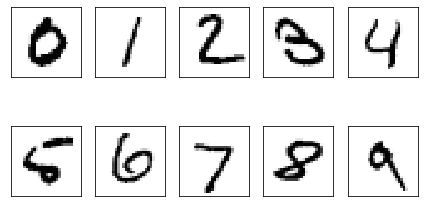

Wall time: 1.53 s


In [2]:
%%time

import matplotlib.pyplot as plt

fig, ax = plt.subplots(
    nrows=2,
    ncols=5,
    sharex=True,
    sharey=True, )

ax = ax.flatten()
for i in range(10):
    img = x_test[y_test == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()


In [3]:
print(x_train.shape, len(y_train))
print(y_train[0:10])
print(x_test.shape, len(y_test))
print(y_test[0:10])

(60000, 28, 28) 60000
[5 0 4 1 9 2 1 3 1 4]
(10000, 28, 28) 10000
[7 2 1 0 4 1 4 9 5 9]


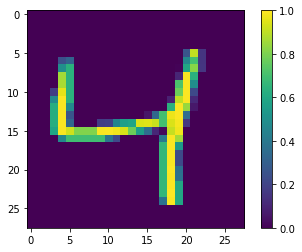

In [6]:
# 显示训练集的第一个 28X28 图片
plt.figure()
plt.imshow(x_train[2])
plt.colorbar()
plt.grid(False)
plt.show()